In [1]:
import numpy as np
import pandas as pd
import math
import itertools
from sklearn.metrics import DistanceMetric
import networkx as nx
from numpy import inf


In [2]:
# coverting the input csv file into a graph
def getGraph(csv,measure) :
    
    # Uploading the files
    df = pd.read_csv(csv)
    df.head()
    df_cluster = df.iloc[:,1:13]
    
    # Converting the file into Graph
    dist = DistanceMetric.get_metric(measure)
    matrix_dist = dist.pairwise(df_cluster.to_numpy())
    Graph=nx.from_numpy_matrix(matrix_dist)
    draw_graph(Graph)
    
    return matrix_dist, Graph
    

In [3]:
#Function to draw graph
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

In [4]:
#equation fro adjacency matrix
def equation(x):
    n = 0.4
    function = np.exp(-((matrix_dist ** 2) / (2. * n ** 2)))
    return function 
    

In [5]:
#Getting adjacency matrix for all the points in csv
def getAjacency(matrix):
    adacency_matrix = []
    for row in matrix_dist:
        x = []
        for point in row:
            x.append(equation(point))
            adacency_matrix.append(x)
    print(np.array(adacency_matrix))
    return adacency_matrix 

In [6]:
def getLaplacian(Graph,matrix_dist):
    D = Graph.degree()
    degrees = [val for (node, val) in Graph.degree()]
    D = np.zeros((len(degrees), len(degrees)))
    np.fill_diagonal(D, degrees)
#     print('degree matrix:')
    print(D)
    L = D - matrix_dist
    
#Normalized laplacian matrix
    D_half = linalg.fractional_matrix_power(D, -0.5)
    LN = np.matmul(np.matmul(D_half, L), D_half)
    
#  print('laplacian matrix:')
    print(LN)
    return D,L,LN


In [7]:
def getEigen(LN):
    e, v = np.linalg.eig(LN)
        # eigenvalues
    print('eigenvalues:')
    print(e)
        # eigenvectors
    print('eigenvectors:')
    print(v)
    return e,v
    

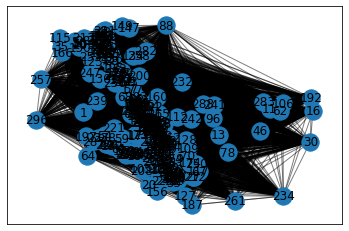

In [8]:
matrix_dist, Graph = getGraph("HeartFailure.csv","euclidean")

In [9]:
print(matrix_dist)

[[     0.           7461.94827916 103000.92333741 ... 477002.37119768
  125013.7195001  130000.88170889]
 [  7461.94827916      0.         101651.22697499 ... 478677.19981275
  123478.57896239 131865.22819429]
 [103000.92333741 101651.22697499      0.         ... 580003.22319902
   22118.19755337 233000.17313961]
 ...
 [477002.37119768 478677.19981275 580003.22319902 ...      0.
  602000.10390727 347005.00688411]
 [125013.7195001  123478.57896239  22118.19755337 ... 602000.10390727
       0.         255009.63747286]
 [130000.88170889 131865.22819429 233000.17313961 ... 347005.00688411
  255009.63747286      0.        ]]


In [ ]:
adjacency_matrix= getAjacency(matrix_dist)
print(adjacency_matrix)

In [ ]:
D,L,LN = getLaplacian(Graph,matrix_dist)

In [ ]:
e,v = getEigen(LN)

In [ ]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

In [ ]:
U = np.array(v[:, i[0]])
km = KMeans(init='k-means++', n_clusters=3)
df['clusters'] = km.fit_predict(U)
df